In [2]:
import seaborn as sns
import pandas as pd

In [12]:
df = pd.read_csv('churn_modelling.csv')
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [13]:
df.shape

(10000, 14)

In [14]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [16]:
#Input Data
x = df[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
#Output Data
y = df['Exited']

In [19]:
x

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619   42       2       0.00              1          1   
1             608   41       1   83807.86              1          0   
2             502   42       8  159660.80              3          1   
3             699   39       1       0.00              2          0   
4             850   43       2  125510.82              1          1   
...           ...  ...     ...        ...            ...        ...   
9995          771   39       5       0.00              2          1   
9996          516   35      10   57369.61              1          1   
9997          709   36       7       0.00              1          0   
9998          772   42       3   75075.31              2          1   
9999          792   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  
0                  1        101348.88  
1                  1        112542.58  
2                  0        113931.57  
3                  0         93826.63  
4                  1         79084.10  
...              ...              ...  
9995               0         96270.64  
9996               1        101699.77  
9997               1         42085.58  
9998               0         92888.52  
9999               0         38190.78  

[10000 rows x 8 columns]

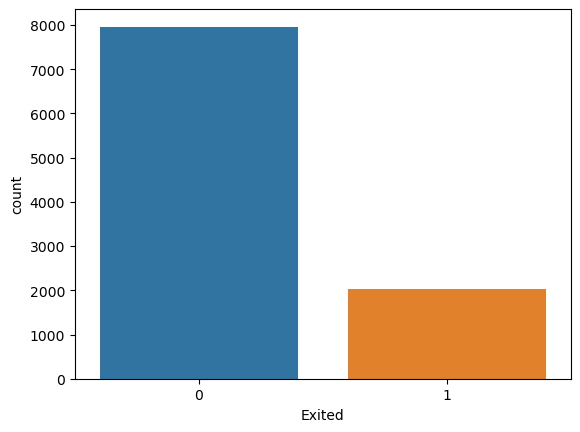

In [22]:
sns.countplot(x = y);

In [24]:
y.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [27]:
#Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [29]:
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-0.32622142,  0.29351742, -1.04175968, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-0.44003595,  0.19816383, -1.38753759, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.53679418,  0.29351742,  1.03290776, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 0.60498839, -0.27860412,  0.68712986, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.25683526,  0.29351742, -0.69598177, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.46377078, -1.04143285, -0.35020386, ...,  0.64609167,
        -1.03067011, -1.07636976]])

In [36]:
#Cross Validation
#test_size = 0.25 is not neccesarry to mention since test size is 25% default
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, random_state=0, test_size=0.25)

In [37]:
x.shape

(10000, 8)

In [38]:
x_test.shape

(2500, 8)

In [39]:
x_train.shape

(7500, 8)

In [40]:
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier(hidden_layer_sizes=(100,100,100), random_state=0, max_iter=100, activation='relu')

In [41]:
ann.fit(x_train,y_train) 
#artificial neural network (ann)

/home/penguin/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=100, random_state=0)

In [42]:
y_pred = ann.predict(x_test)

In [44]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score

In [45]:
y_test.value_counts()

Exited
0    1991
1     509
Name: count, dtype: int64

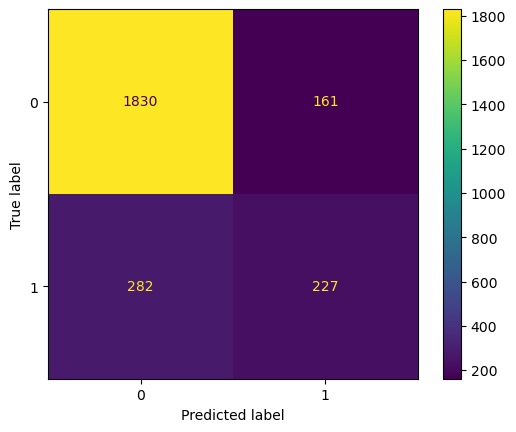

In [46]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [47]:
accuracy_score(y_test,y_pred)

0.8228

In [49]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      1991
           1       0.59      0.45      0.51       509

    accuracy                           0.82      2500
   macro avg       0.73      0.68      0.70      2500
weighted avg       0.81      0.82      0.81      2500



In [51]:
#Class 0 has 92% recall, which is a good score
#Class 1 which has exit value 1  has recall 45%, which is a score 
#Reason - 0 has more entries, 1 has less

In [52]:
# Identify the points of improvement and implement the same.

# for this, ome changes done in above code  in part 2 